In [7]:
import numpy as np
import matplotlib.pyplot as plt
from rbc_pinn_surrogate.data import RBCDatamodule2D
from rbc_pinn_surrogate.loss import RBCEquationLoss

ras = [10000, 100000, 1000000]

## Define PINO loss

In [8]:
# pino loss
def setup_pino_loss(dm: RBCDatamodule2D):
    train_time = dm.hparams.train_steps * dm.hparams.stride * 0.5
    kappa = 1 / np.sqrt(dm.hparams.ra * 0.7)
    nu = np.sqrt(0.7 / dm.hparams.ra)
    return RBCEquationLoss(
        domain_width=2 * np.pi,
        domain_height=2,
        time=train_time,
        kappa=kappa,
        nu=nu,
    )

##

## PINO loss for 2D data per split

Calculating PINO loss for Ra = 10000
Mean divergence loss    : 0.004583
Mean temperature loss   : 0.000219
Mean momentum loss      : 0.002564


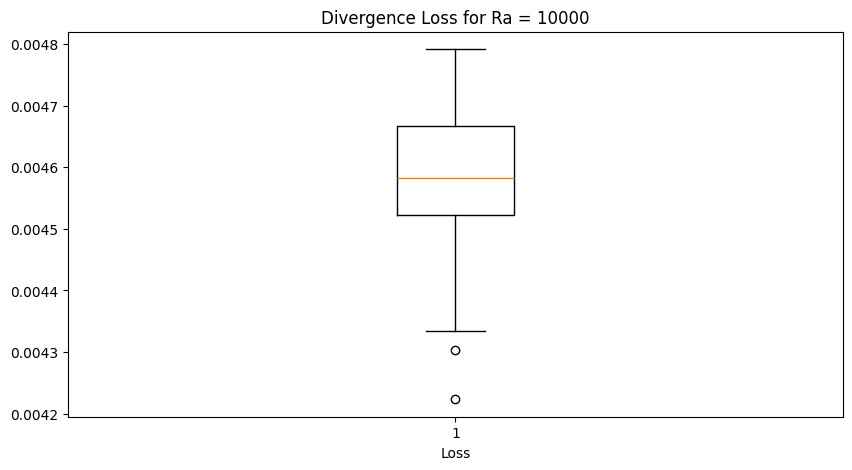

Calculating PINO loss for Ra = 100000
Mean divergence loss    : 0.010627
Mean temperature loss   : 0.001009
Mean momentum loss      : 0.004934


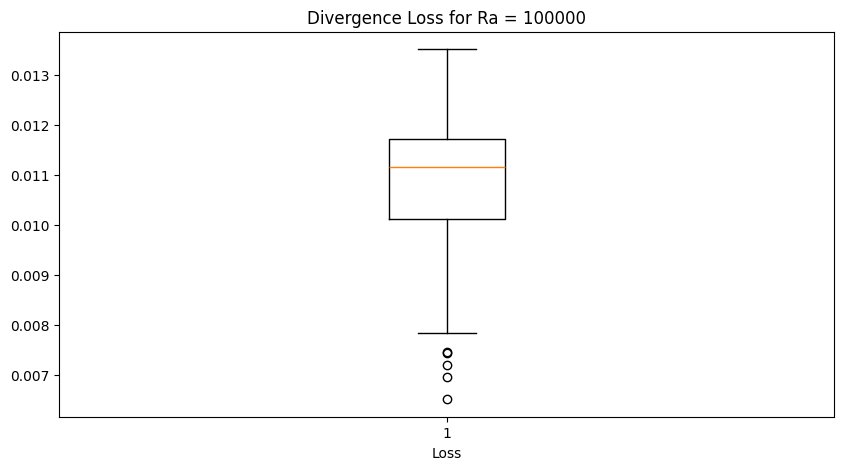

Calculating PINO loss for Ra = 1000000
Mean divergence loss    : 0.025871
Mean temperature loss   : 0.008311
Mean momentum loss      : 0.020573


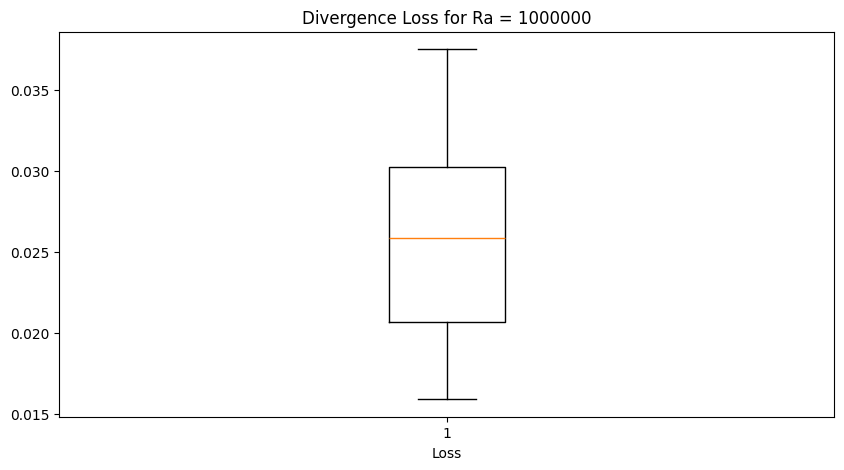

In [ ]:
for ra in ras:
    print(f"Calculating PINO loss for Ra = {ra}")
    dm = RBCDatamodule2D(
        data_dir="../data/2D",
        batch_size=1,
        ra=ra,
        pressure=True,
        start=200,
        end=600,
        train_steps=10,
        test_steps=10,
        train_shift=20,
        test_shift=20,
        nr_episodes_train=2,
        nr_episodes_val=2,
        nr_episodes_test=2,
        normalize=False,
    )
    dm.setup(stage="fit")
    dm.setup(stage="test")
    pino_loss = setup_pino_loss(dm)

    # iterate over the dataloaders
    loss_div = []
    loss_temp = []
    loss_mom = []
    for x, _ in dm.train_dataloader():
        div, temp, mom = pino_loss(x)
        loss_div.append(div)
        loss_temp.append(temp)
        loss_mom.append(mom)

    print(f"Mean divergence loss    : {np.mean(loss_div):.6f}")
    print(f"Mean temperature loss   : {np.mean(loss_temp):.6f}")
    print(f"Mean momentum loss      : {np.mean(loss_mom):.6f}")

    # boxplot with matplotlib over loss
    plt.figure(figsize=(10, 5))
    plt.boxplot(loss_div)
    plt.title(f"Divergence Loss for Ra = {ra}")
    plt.xlabel("Loss")
    plt.show()